In [1]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd

import re # to access database details in a file
import time # to time how long queries and processes take
import matplotlib.pyplot as plt
from datetime import datetime # to manipulate dates

% matplotlib inline

In [2]:
path='/Users/brianna/Documents/WL_DBdeets/'

In [3]:
def connect_db(which_db):
    # Grab the details from a text file for how to access the database
    db_file = open(path+which_db+'DBdeets.txt','r')
    db_deets = db_file.read()

    dbname=re.findall('dbname=(\S+)',db_deets)
    username=re.findall('username=(\S+)',db_deets)
    hostname=re.findall('hostname=(\S+)',db_deets)
    portname=re.findall('portname=(\S+)',db_deets)
    pw=re.findall('pw=(\S+)',db_deets)
    
    # Connect to the database.  (If you can't, jump out and give a polite notice!)
    con = None
    try:
        con = psycopg2.connect(database = dbname[0], 
                               user = username[0], 
                               host = hostname[0], 
                               port = portname[0], 
                               password = pw[0])
        # Set up a cursor.  (Anytime you get an error with the cursor, you have to reset the 
        # connection with it)
        cur=con.cursor()
        print('I connected to the '+which_db+' database!!')
    except:
        print('Unable to connect to '+which_db+' database :(')
    
    db_file.close()
    
    return  con, cur

In [4]:
# Access the 'events' database.
conE, curE = connect_db('evnt')

# Access the 'transactions' database.
conT, curT = connect_db('trns')

I connected to the evnt database!!
I connected to the trns database!!


# Merge the two databases by finding the key that translates their ids

In [30]:
# Make a list of everyone who's signed up (AKA had a sign-up event)

starttime=time.time()

sql_query="""
    select user_id, u_email, event_time
    from app131567.signed_up
"""

query_result = pd.read_sql_query(sql_query,conE)

print(time.time()-starttime)

df_Ecodes=query_result.iloc[:]

2.1267118454


18072
17169
13025
13473


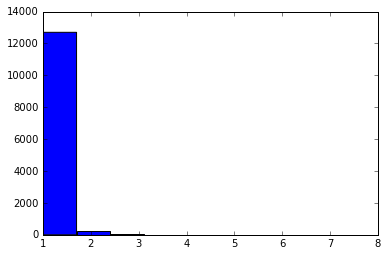

In [31]:


#df_signups.head
print(len(df_Ecodes[:]['user_id']))
print(len(df_Ecodes[:]['user_id'].unique()))
print(len(df_Ecodes[:]['u_email'].unique()))

#type(df_Ecodes.groupby(['u_email']).size()[:])
plt.hist(df_Ecodes.groupby(['u_email']).size()[:])
print(sum(df_Ecodes.groupby(['u_email']).size()[:]))

In [10]:
# Before we can save these data of when people signed up, we have to match with the user_id 
# of the transactional database.  I'll use the email addresses to make a key to combine the 
# user_id's from both databases.

starttime=time.time()

sql_query="""
select id, primary_email 
from users
"""

query_result = pd.read_sql_query(sql_query,conT)

print(time.time()-starttime)

1.86041808128


In [13]:
df_Tcodes=query_result.iloc[:]
print(len(df_Tcodes[:]['id']))
print(len(df_Tcodes[:]['id'].unique()))
print(len(df_Tcodes[:]['primary_email'].unique()))

df_Tcodes.groupby(['primary_email']).size()
#df_allmtngs.groupby(['user_id']).size()

37553
37553
37344


primary_email
04nk1986@rambler.ru                      1
0jetpistol0@gmail.com                    1
0q0zwl@gmail.com                         1
1.27201@gmail.com                        1
100018990@mvla.net                       1
100018999@mvla.net                       1
1002977@student.sae.edu.au               1
123ouii@gmail.com                        1
126janzamo@nhusd.k12.ca.us               1
12vickie@gmail.com                       1
130010749@patterson.k12.ca.us            1
1542258455@qq.com                        1
15woolnough.daniel@wollemi.nsw.edu.au    1
17458779@student.uws.edu.au              1
17bartolo.nathan@wollemi.nsw.edu.au      1
17bernacer.patrick@wollemi.nsw.edu.au    1
17inginos@ogschool.org                   1
186lightspeed@gmail.com                  1
18gilbert.liam@wollemi.nsw.edu.au        1
18woolnough.joseph@wollemi.nsw.edu.au    1
19devine.alani@wollemi.nsw.edu.au        1
1@ba.se                                  1
1@fact0ry.com                           

In [13]:
keyDF = merge(df_Tcodes, )

In [17]:
print(len(df_allevts[:]['user_id'].unique()))
print(len(df_allevts[:]['user_id']))


18201
310323


In [6]:
# Let's look at number of meetings and user_id for events within the past 7 days
# GROUP BY user ID!
# This took 250 seconds (~4 min) to run over the past 7 days

starttime=time.time()

sql_query="""
select distinct c.user_id, count(e.time_range) num_meetings
from users u
join 
    calendars c
on
    u.id = c.user_id
left outer join 
    events e 
on 
    e.calendar_id = c.id
where lower(e.time_range) between (current_date - INTERVAL '7 days') and current_date
and json_array_length(e.attendees) > 0
group by c.user_id
"""

query_result = pd.read_sql_query(sql_query,conT)

print(time.time()-starttime)

250.074972868


In [15]:
df_allevts=query_result.iloc[:]
df_allevts.columns

AttributeError: 'DataFrame' object has no attribute 'num_attendees'

In [16]:
print(len(df_allevts[:]['user_id'].unique()))
print(len(df_allevts[:]['user_id']))

df_allevts[1:10]['user_id']

18201
310323


1    55a96f3a88d12f25e28c3a05
2    5626c4e48a7fb211d2a833a4
3    55e8c78a8ed8bb343d3d998c
4    5665b492afd3c65089b0b1a6
5    54dd311e98a41d404cf5f76f
6    55f03cdb8e41046db9c9c60d
7    554290e7c164865117e00eb4
8    55d4b90f51783604841a24cf
9    551ad1fd9283a553dac3a020
Name: user_id, dtype: object

In [ ]:
# Ok, this is just to keep the dataframe that I made with all of the individual events per 
# person (before I subset into meetings with other people.)
events = meetings


In [ ]:
# Find the number of meetings that each user has had in the amount of time specified in the SQL query
# First just do a groupby command over a subset of the data
print(df_allevts.columns)
print(df.columns)
df.groupby(['user_id']).agg(['meeting_start'])
#df[['user_id', 'num_attendees']].groupby(['user_id']).agg(['num_attendees'])

In [ ]:
# Make a dict of user_id paired with number of meetings

#meeting_count = dict()
meeting_count = pd.DataFrame(columns=['user_id', 'num_meetings'])

i=0
for line in df.groupby('user_id'):
#    meeting_count[line[0]] = len(line[1])
    #meeting_count.user_id[i]=line[0]
    #meeting_count.num_meetings[i]=len(line[1])
    if i < 1:
        print(line)
    i +=1

In [ ]:
df.groupby('user_id')

In [ ]:
x = df.groupby('user_id')
type(x)

df.groupby('').size().plot(kind='bar')

In [ ]:
for user in meetings.user_id:
    #print(user)
    meetings.num_meetings[meetings.user_id == user]=len(df[df['user_id'] == user])
    
#print(time.time()-starttime)
#meetings.head

In [ ]:
plt.figure(figsize=(20,10))
#plt.legend('Number of attendees at each meeting (people that signed up in the past 1 day)', fontsize=25)

meetings.groupby('num_meetings').size().plot(kind='bar')
plt.savefig('NumberOfMeetingsInPastWeekAllUsers.png')

In [ ]:
# All calendar events for users registering in past 7 days
# (This takes a few minutes to run)

sql_query="""
select u.primary_email, c.user_id, c.source_id, c.type, c.active, c.title, 
json_array_length(e.attendees) attendee_count, e.time_range, e.title
from users u
join     
    calendars c
on     
    u.id = c.user_id
left outer join 
    events e 
on 
    e.calendar_id = c.id
    and lower(e.time_range) between (current_date - INTERVAL '7 days') and current_date
where u.id = c.user_id
and u.created_at > current_date - INTERVAL '7 days'
and json_array_length(e.attendees) > 0
"""

query_result = pd.read_sql_query(sql_query,conT)

In [ ]:
df=query_result.iloc[:]

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(20,10))
#plt.legend('Number of attendees at each meeting (people that signed up in the past 1 day)', fontsize=25)

df.groupby('attendee_count').size().plot(kind='bar')

In [ ]:
for time_range in query_result.iloc[1:5]['user_id']:
    print(time_range)

In [ ]:
# People from companies viewing a meeting details page by week
# event data

# Select 4 columns of data (company, date, number of users, and number of events)
# from the table which holds data from events where people viewed the meeting_details
# page.  Then group the data by week and company name
sql_query="""
select 
    u_company_name as company,
    date_trunc('week', event_time)::date as week,
    count(distinct user_id) as users, 
    count(*) as events
from app131567.viewed_meeting_details_page
group by date_trunc('week', event_time)::date, u_company_name
order by company, week asc
"""


query_result = pd.read_sql_query(sql_query,conE)

In [ ]:
#plt.scatter(df.users[df.company=='15five.com'],df.events[df.company=='15five.com'] )


In [ ]:
# People from companies viewing a meeting details page by week
# event data

# Select 2 columns of data (date, number of unique users)
# from the table which holds data from events where people viewed the meeting_details
# page.  Then group the data by week.

sql_query="""
select 
    date_trunc('week', event_time)::date as week,
    count(distinct user_id) as users
from app131567.viewed_meeting_details_page
group by date_trunc('week', event_time)::date
order by week asc
"""

query_result = pd.read_sql_query(sql_query,conE)

df = query_result.iloc[:]

In [ ]:
date_cutoff = datetime.strptime('2015-08-02', '%Y-%m-%d').date()

xlabel='Week'
ylabel='Number of Users logged in (at least once)'
plt.figure(figsize=(20,10))
plt.xlabel(xlabel, fontsize=25)
plt.ylabel(ylabel, fontsize=25)

# histogram of count of weeks
#df.groupby('week').size().plot(kind='bar')

plt.plot(df.week[df.week > date_cutoff], df.users[df.week > date_cutoff])
plt.plot(df.week, df.users)
#plt.scatter(query_result.iloc[:]['users'], query_result.iloc[:]['events'], color="red")
#plt.scatter(df.users[df.users < 500], df.events[df.users < 500], color="red")
#plt.scatter(df.users[df.users < 100], df.events[df.users < 100], color="red")
#plt.scatter(df.users[df.users > 1500], df.events[df.users > 1500], color="red")
#plt.scatter(df.users, df.events, color="red")

plt.savefig(path+xlabel+'BY'+ylabel+'.png')


In [ ]:
# Trailing 7 day calendar events for a specific user id

# sql_query="""
# select c.user_id, c.source_id, c.type, c.active, c.title, e.* 
# from calendars c, events e
# where c.id = e.calendar_id
# and c.user_id = '54d14f9453832673fdd7c29c'
# and lower(time_range) between (current_date - INTERVAL '7 days') and current_date
# """

# calendars variables:
# id, type, source_id, active, raw, created_at, updated_at, sync, legacy, last_event_sync_at, last_calendar_sync_at,
# deleted_at, user_id, needs_sync, integration_id, title

# event variables:
# id, type, source_id, calendar_id, raw, created_at, updated_at, time_range, legacy, ignored, title, location, 
# source_url, attendees, global_id, recurring_event_id

sql_query="""
select e.*
from calendars c, events e
where c.id = e.calendar_id
and c.user_id = '54d14f9453832673fdd7c29c'
and lower(time_range) between (current_date - INTERVAL '7 days') and current_date
"""

query_result = pd.read_sql_query(sql_query,conT)